Accuracy score 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



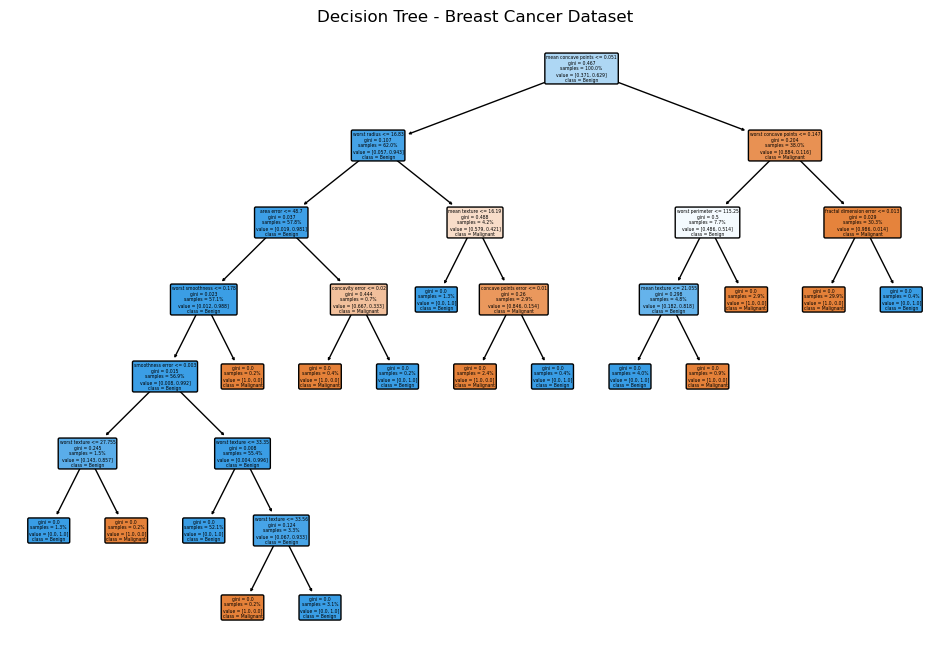


Classified sample:Benign)


In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

def load_and_preprocess_data():
    cancer_data = load_breast_cancer()
    X = cancer_data.data
    y = cancer_data.target
    feature_names=cancer_data.feature_names
    target_names=cancer_data.target_names
    return X,y,feature_names,target_names

def train_decision_tree(X_tree,y_train):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    return clf

def plot_decision_tree(clf,feature_names):
    plt.figure(figsize=(12,8))
    plot_tree(clf, filled=True, feature_names=feature_names, class_names=["Malignant","Benign"],rounded=True,proportion=True)
    plt.title("Decision Tree - Breast Cancer Dataset")
    plt.show()

def classify_new_sample(clf,sample):
    sample=np.array(sample).reshape(1,-1)
    prediction=clf.predict(sample)
    return prediction

def main():
    X,y,feature_names,target_names=load_and_preprocess_data()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    clf=train_decision_tree(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy score",accuracy_score(y_test,y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test,y_pred,target_names=target_names))
    plot_decision_tree(clf,feature_names)
    sample=X_test[0]
    prediction=classify_new_sample(clf,sample)
    print(f"\nClassified sample:{'Benign' if prediction==1 else 'Malignant'})")
    
if __name__=="__main__":
    main()